In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("loan_data.csv")
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.shape

(9578, 14)

In [4]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [5]:
df["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [6]:
#Checking null values
df.isnull().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [7]:
#data doesn't have null values...good to go..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit_policy        9578 non-null int64
purpose              9578 non-null object
int_rate             9578 non-null float64
installment          9578 non-null float64
log_annual_inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days_with_cr_line    9578 non-null float64
revol_bal            9578 non-null int64
revol_util           9578 non-null float64
inq_last_6mths       9578 non-null int64
delinq_2yrs          9578 non-null int64
pub_rec              9578 non-null int64
not_fully_paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
#pivot table with index as purpose
df.pivot_table(df,index="purpose")

,credit_policy,days_with_cr_line,delinq_2yrs,dti,fico,inq_last_6mths,installment,int_rate,log_annual_inc,not_fully_paid,pub_rec,revol_bal,revol_util
purpose,,,,,,,,,,,,,
all_other,0.787216,4311.706153,0.179751,11.079498,715.344058,1.646504,244.937542,0.116771,10.845313,0.166023,0.048048,12883.039897,39.712321
credit_card,0.808241,4857.005943,0.151347,14.099398,709.626783,1.387480,319.500713,0.119738,11.047230,0.115689,0.072108,23180.020602,53.600475
debt_consolidation,0.814506,4533.037139,0.163255,14.076462,703.871367,1.461461,358.984390,0.126595,10.912909,0.152388,0.070508,17146.710639,54.125504
educational,0.740525,4008.595724,0.157434,11.344927,708.282799,1.854227,217.547201,0.119907,10.549956,0.201166,0.043732,10828.897959,38.801166
home_improvement,0.813990,5201.995562,0.136725,10.197504,724.806041,1.941176,337.071590,0.117507,11.201979,0.170111,0.066773,17328.756757,34.274626
major_purchase,0.848970,4325.969108,0.173913,10.159886,722.503432,1.562929,243.483913,0.114171,10.844895,0.112128,0.048055,7281.453089,32.457895
small_business,0.799677,4892.115778,0.155089,10.793296,719.988691,1.933764,433.826607,0.138087,11.146216,0.277868,0.056543,27581.203554,40.070436


In [9]:
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
print("Here, credit_policy is the credit approval status. 1 is equivalent to approved credit, 0 means not approved")
print(df["credit_policy"].value_counts())

Here, credit_policy is the credit approval status. 1 is equivalent to approved credit, 0 means not approved
1    7710
0    1868
Name: credit_policy, dtype: int64


In [11]:
df.corr()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int_rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log_annual_inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days_with_cr_line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol_bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol_util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq_last_6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,2,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,0,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,4,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,2,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [13]:
df["purpose"].unique()

array([2, 1, 0, 4, 6, 5, 3], dtype=int64)

# Exploratory Data Analysis

Text(0.5, 0, 'FICO score')

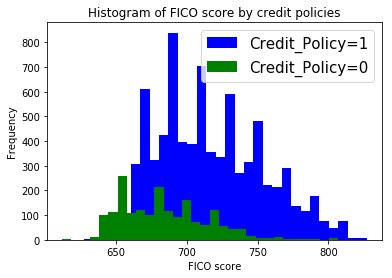

In [14]:
df[df['credit_policy']==1]['fico'].plot.hist(bins=30,color='blue', label='Credit_Policy=1')
df[df['credit_policy']==0]['fico'].plot.hist(bins=30, color='green', label='Credit_Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score by credit policies")
plt.xlabel("FICO score")

Text(0, 0.5, 'Revol_Util')

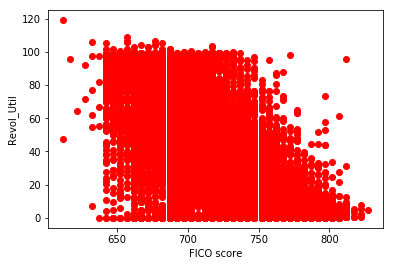

In [15]:
%matplotlib inline
plt.scatter(df["fico"],df["revol_util"],color="r")
plt.xlabel("FICO score")
plt.ylabel("Revol_Util")

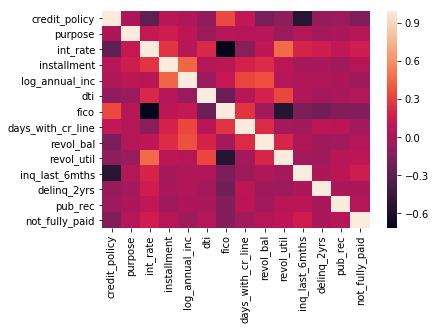

In [16]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr)

Text(0, 0.5, 'Interest rate')

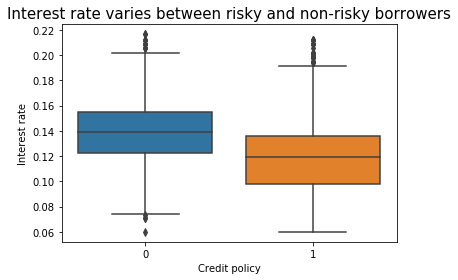

In [17]:
sns.boxplot(x=df['credit_policy'],y=df['int_rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy")
plt.ylabel("Interest rate")

Text(0, 0.5, 'Log. annual income')

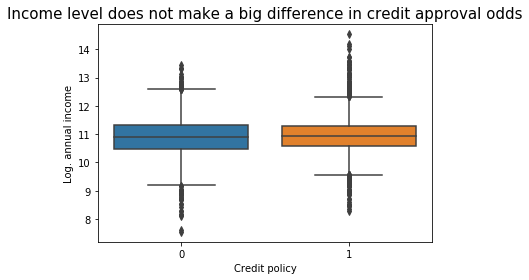

In [18]:
sns.boxplot(x=df['credit_policy'],y=df['log_annual_inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy")
plt.ylabel("Log. annual income")

Text(0, 0.5, 'Days with credit line')

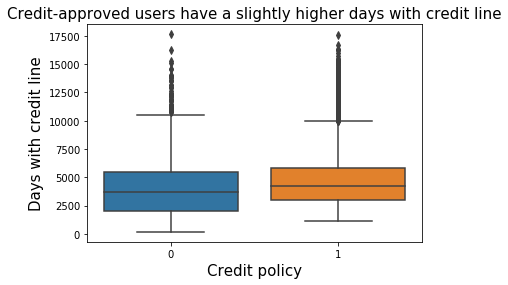

In [19]:
sns.boxplot(x=df['credit_policy'],y=df['days_with_cr_line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

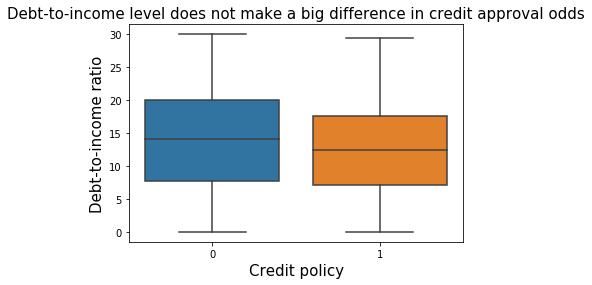

In [20]:
sns.boxplot(x=df['credit_policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

Text(0.5, 0, 'Purpose')

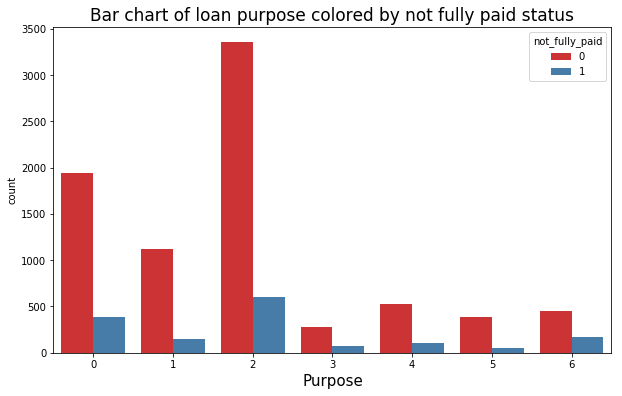

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not_fully_paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

# Model selection

In [22]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [23]:
X=df.drop(columns="not_fully_paid")
Y=df["not_fully_paid"]

In [24]:
X

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0
6,1,2,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1
7,1,0,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0
8,1,4,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0
9,1,2,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0


In [25]:
Y

0       0
1       0
2       0
3       0
4       0
5       0
6       1
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9548    1
9549    1
9550    0
9551    1
9552    0
9553    0
9554    0
9555    1
9556    0
9557    0
9558    0
9559    0
9560    0
9561    0
9562    0
9563    1
9564    0
9565    1
9566    1
9567    0
9568    0
9569    1
9570    1
9571    1
9572    1
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not_fully_paid, Length: 9578, dtype: int64

# Preprocessing the data

In [26]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.33333333, 0.37659847, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.16666667, 0.3011509 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.48401535, ..., 0.03030303, 0.        ,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.3011509 , ..., 0.24242424, 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.63938619, ..., 0.15151515, 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.50639386, ..., 0.18181818, 0.        ,
        0.        ]])

# TRAIN TEST SPLIT

In [27]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [28]:
X_train

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
6151,1,0,0.0894,285.95,10.778956,16.35,737,4050.000000,9348,22.2,3,0,0
7336,1,0,0.1533,278.63,10.491274,8.47,662,2389.041667,5618,65.3,2,0,0
2694,1,1,0.1316,844.26,11.736069,8.24,727,5549.958333,14323,50.3,1,0,0
3399,1,0,0.0963,282.43,11.093585,4.89,757,4620.000000,6055,31.9,0,0,0
3095,1,1,0.1253,334.67,10.971641,22.95,697,2609.958333,16047,78.7,0,0,0
6901,1,2,0.1218,832.50,11.661345,16.99,737,7920.041667,32446,56.1,0,0,0
1035,1,0,0.0832,110.20,10.632588,9.86,752,7170.000000,11077,56.2,0,0,0
8721,0,2,0.1418,181.61,10.915016,10.04,657,5100.000000,3729,70.4,3,0,0
7025,1,2,0.1287,201.80,10.085809,8.70,692,2400.041667,3374,63.7,0,0,0
278,1,2,0.1122,656.86,10.559867,14.04,702,1800.000000,21777,53.7,3,0,0


In [29]:
X_test

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
4933,1,2,0.1148,131.88,10.736397,22.93,717,3690.000000,0,0.0,0,0,0
8758,0,0,0.1538,174.26,10.778956,15.65,652,4020.000000,901,42.9,1,0,1
5455,1,0,0.1461,289.60,10.925938,20.20,667,2220.000000,22851,78.2,1,0,0
4868,1,2,0.1148,560.47,11.472103,23.18,742,5280.000000,11265,24.3,0,0,0
8663,0,1,0.1261,234.55,11.184421,25.78,742,12218.958330,52964,71.1,3,0,0
4993,1,2,0.1253,200.80,11.156193,17.28,687,4800.000000,33711,81.6,2,0,0
1086,1,3,0.1008,226.14,10.404263,18.91,717,3480.958333,9379,10.9,0,1,0
8952,0,2,0.1411,143.77,11.083127,14.24,682,6930.000000,17126,81.6,5,0,0
6271,1,1,0.1357,285.34,10.983053,21.34,677,6270.041667,55072,87.8,0,0,0
901,1,2,0.1039,324.51,11.038110,10.59,707,1469.958333,7618,47.2,2,0,0


In [30]:
Y_train

6151    0
7336    0
2694    1
3399    0
3095    0
6901    0
1035    0
8721    0
7025    0
278     0
2124    0
9554    0
5146    0
7633    0
139     0
4693    0
8673    0
7307    0
1368    0
423     0
9089    0
2351    0
3274    0
5743    0
3374    0
9244    0
6274    0
5016    0
3890    0
3583    0
       ..
6595    0
3285    0
5835    0
4624    0
165     1
838     0
1180    0
6018    0
9084    1
1724    1
7361    0
7007    0
5397    0
3104    0
1704    0
7490    0
3160    0
6557    0
5196    0
8676    0
3799    0
432     0
5331    0
8762    1
2632    0
3848    0
2366    0
4872    0
5503    0
4671    0
Name: not_fully_paid, Length: 7662, dtype: int64

In [31]:
Y_test

4933    0
8758    0
5455    0
4868    0
8663    0
4993    0
1086    0
8952    0
6271    0
901     0
8670    1
2907    0
9003    0
4607    0
4918    0
1799    0
6747    0
1503    0
4309    0
8146    1
213     0
5810    0
6575    0
1907    0
2123    0
9387    0
2458    0
7835    0
3151    0
1393    0
       ..
6968    0
5553    0
8512    0
4488    0
603     0
4484    0
4777    0
3082    0
912     0
4786    0
4060    0
65      1
6181    0
3046    0
4284    0
8461    0
7591    1
8094    1
4992    0
2056    0
6306    0
8755    0
8230    1
4972    0
4447    0
1085    0
5344    0
2639    0
5227    1
7294    0
Name: not_fully_paid, Length: 1916, dtype: int64

# KNN classifier

In [32]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
Y_pred=clf.predict(X_test)

In [34]:
print('Actual Not_Fully_Paid')
print(Y_test.values)

Actual Not_Fully_Paid
[0 0 0 ... 0 1 0]


In [35]:
print('Predicted Not_Fully_Paid')
print(Y_pred)

Predicted Not_Fully_Paid
[0 0 0 ... 0 0 0]


In [36]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

knn_acc=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 




Accuracy score: 81.784969
Recall score : 3.618421
ROC score : 50.072238

[[1556   56]
 [ 293   11]]


In [37]:
print("Error Rate:{}".format((30+140)/(958)))


Error Rate:0.17745302713987474


In [38]:

#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(X_test)

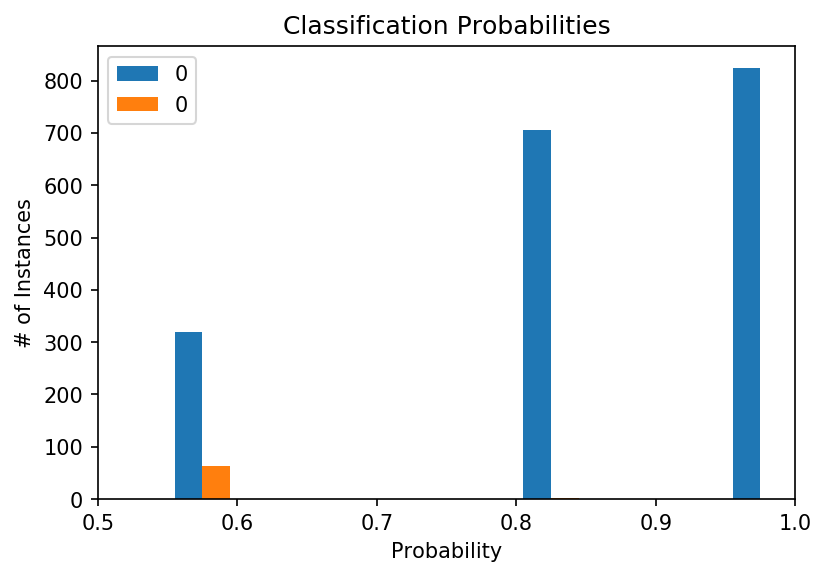

In [39]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(Y_test)
plt.show()

# Observation

In [40]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [41]:
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [42]:
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)

In [43]:
clf_proba = cross_val_predict(clf, X_train_std, Y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class 

In [44]:
clf_acc

array([0.81604697, 0.81675803, 0.81746964])

# Logistic Regression

In [45]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_acc = cross_val_score(lr, X_train_std, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, Y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
lr_acc

array([0.8407045 , 0.83985904, 0.83862123])

In [47]:
#Predict on test data
Y_pred=lr.predict(X_test)

In [48]:
x_new=[[]]

In [49]:
print('Actual Not_Fully_Paid')
print(Y_test.values)

Actual Not_Fully_Paid
[0 0 0 ... 0 1 0]


In [50]:
print('Predicted Not_Fully_Paid')
print(Y_pred)

Predicted Not_Fully_Paid
[0 0 0 ... 0 0 0]


In [51]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_lr=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 83.977035
Recall score : 1.973684
ROC score : 50.707686

[[1603    9]
 [ 298    6]]


In [52]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# SVM

In [53]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, X_train_std, Y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
svc_acc

array([0.83953033, 0.8394675 , 0.83979632])

In [56]:
#Predict on test data
Y_pred=svc_classifier.predict(X_test)

In [57]:
print("Actual Not_Fully_Paid ")
print(Y_test.values)

Actual Not_Fully_Paid 
[0 0 0 ... 0 1 0]


In [58]:
print("Predicted Not_Fully_Paid : ")
print(Y_pred)

Predicted Not_Fully_Paid : 
[0 0 0 ... 0 0 0]


In [59]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_svm=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 84.133612
Recall score : 0.000000
ROC score : 50.000000

[[1612    0]
 [ 304    0]]


# DECISION TREE

In [60]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,Y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, Y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]
dtc_clf_acc

array([0.74403131, 0.72592013, 0.74187231])

In [61]:
#Predict on test data
Y_pred=dtc_clf.predict(X_test)

In [62]:
print("Actual Not_Fully_Paid ")
print(Y_test.values)

Actual Not_Fully_Paid 
[0 0 0 ... 0 1 0]


In [63]:
print("Predicted Not_Fully_Paid : ")
print(Y_pred)

Predicted Not_Fully_Paid : 
[0 1 0 ... 1 0 0]


In [64]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_dt=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 74.373695
Recall score : 22.368421
ROC score : 53.274781

[[1357  255]
 [ 236   68]]


# Random Forest Classifier

In [65]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=2, random_state=0)
rmf_clf = rmf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [66]:
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, X_train_std, Y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]
rmf_clf_acc

array([0.83953033, 0.8394675 , 0.83979632])

In [67]:
#Predict on test data
Y_pred=rmf.predict(X_test)

In [68]:
print("Actual Not_Fully_Paid ")
print(Y_test.values)

Actual Not_Fully_Paid 
[0 0 0 ... 0 1 0]


In [69]:
print("Predicted Not_Fully_Paid : ")
print(Y_pred)

Predicted Not_Fully_Paid : 
[0 0 0 ... 0 0 0]


In [70]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_rmf=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred)) 


Accuracy score: 84.133612
Recall score : 0.000000
ROC score : 50.000000

[[1612    0]
 [ 304    0]]


In [71]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 0.58 


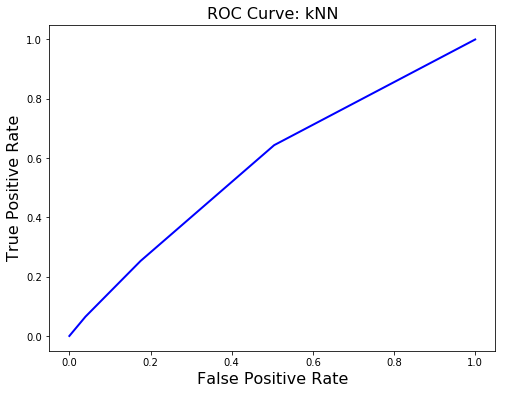

AUC Score (Logistic Regression): 0.67 


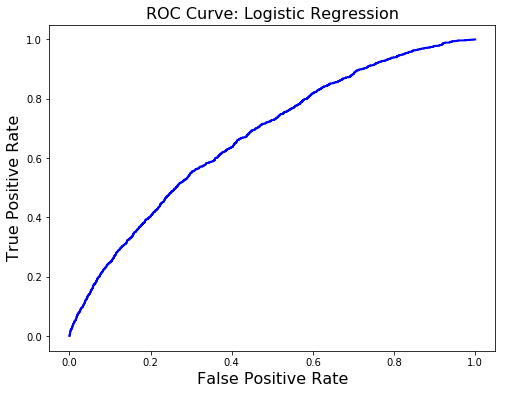

AUC Score (Support Vector Classification): 0.49 


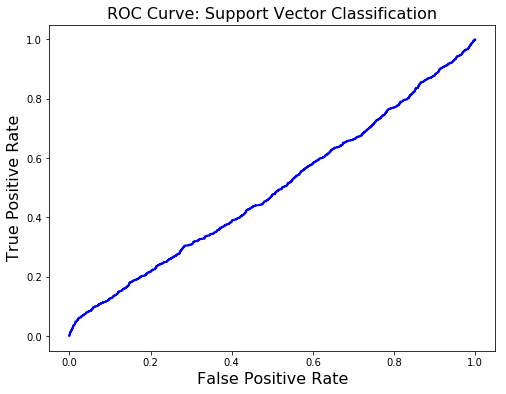

AUC Score (Decision Tree Classifier): 0.53 


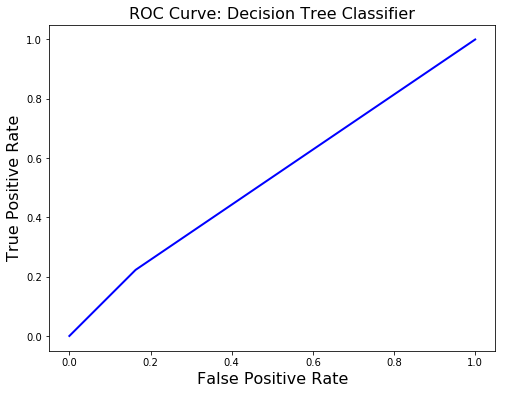

AUC Score (Random Forest Classifier): 0.65 


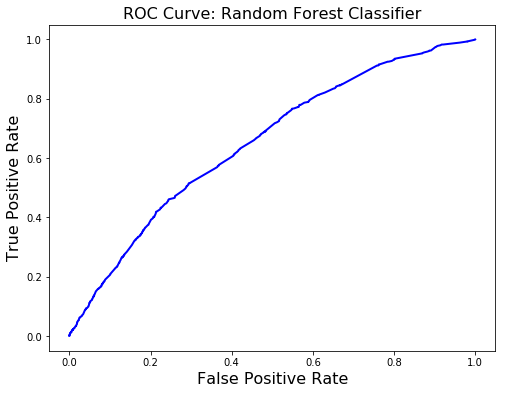

In [72]:
#Plot ROC Curve for each algorithm
ROC_curve('kNN', Y_train, clf_scores)
ROC_curve('Logistic Regression', Y_train, lr_scores)
#ROC_curve('Naive Bayes',y_train,nb_scores)
ROC_curve('Support Vector Classification',Y_train,svc_scores)
ROC_curve('Decision Tree Classifier',Y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',Y_train,rmf_clf_scores)